In [1]:
#izbaciti feature koji koreliraju vise od 99%, drugi scenarij izbaciti gdje je vise od 95% --> usporediti rezultate, uzeti bolji scenarij

# Matrica korelacija

In [2]:
import sys
sys.path.append('../src')
from modules import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('../../data/solubility_features.csv', index_col=0)

In [4]:
kols=data.columns[3:]
df=data.loc[:,kols]

In [5]:
corr = df.corr()
corr

,logp,molwt,balabanj,tpsa,0,1,2,3,4,5,...,1011,1012,1013,1014,1015,1017,1019,1020,1021,1022
logp,1.000000,0.482102,-0.062719,-0.297486,-0.055111,0.022473,0.031494,0.048574,-0.023224,-0.026208,...,-0.000532,0.050014,0.021028,-0.000362,-0.042737,-0.023739,-0.126412,-0.011210,-0.006263,-0.043873
molwt,0.482102,1.000000,-0.282367,0.604473,0.027559,0.035784,-0.019988,0.146933,-0.069363,0.127291,...,0.057975,0.033917,0.030848,-0.012997,-0.019224,-0.009746,0.102624,0.057604,0.056109,-0.053129
balabanj,-0.062719,-0.282367,1.000000,-0.137707,-0.027693,0.192148,-0.144213,-0.147483,-0.207403,-0.125492,...,-0.061621,-0.070766,-0.050299,0.037022,-0.018811,0.036433,-0.515074,-0.079823,-0.049844,0.030041
tpsa,-0.297486,0.604473,-0.137707,1.000000,0.068296,0.066908,-0.029281,0.114626,-0.086380,0.123669,...,0.056524,-0.030922,0.036954,-0.009442,0.013008,0.035811,0.096195,0.041450,0.041901,-0.042954
0,-0.055111,0.027559,-0.027693,0.068296,1.000000,0.004151,-0.022907,0.006590,-0.019868,0.100744,...,0.028543,-0.013962,-0.014863,-0.019180,0.075757,0.000302,0.045999,-0.017603,0.009505,-0.022389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,-0.023739,-0.009746,0.036433,0.035811,0.000302,-0.037260,-0.011818,-0.021283,-0.033194,-0.002815,...,-0.021110,0.061375,0.014370,-0.042058,-0.004552,1.000000,0.034793,0.048200,-0.024987,0.252957
1019,-0.126412,0.102624,-0.515074,0.096195,0.045999,-0.173937,0.071251,0.117382,0.193075,0.168858,...,0.056265,0.115494,0.003677,-0.042577,-0.005107,0.034793,1.000000,0.104915,-0.035342,0.049213
1020,-0.011210,0.057604,-0.079823,0.041450,-0.017603,-0.011839,-0.024405,-0.022686,0.039521,-0.021251,...,-0.014841,-0.014461,-0.015394,-0.019866,-0.017280,0.048200,0.104915,1.000000,-0.013872,0.098225
1021,-0.006263,0.056109,-0.049844,0.041901,0.009505,-0.033566,-0.013395,0.000702,-0.002164,0.002943,...,-0.011292,-0.011003,-0.011713,-0.015115,-0.013148,-0.024987,-0.035342,-0.013872,1.000000,-0.017644


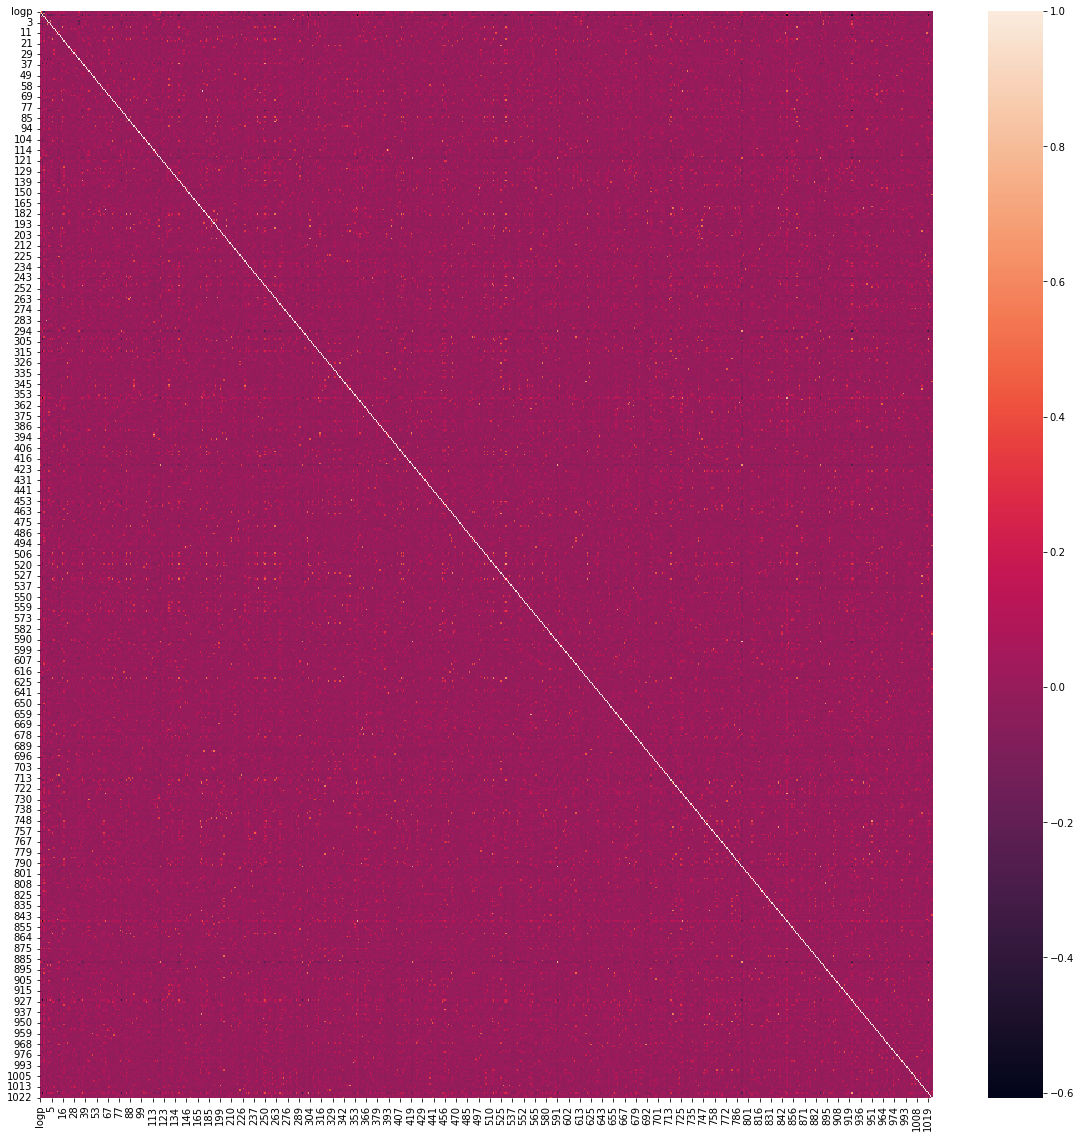

In [6]:
plt.figure(figsize=(20, 20))

sns.heatmap(corr)
plt.show()

In [12]:
# Stvorite gornji trokut korelacijske matrice (da biste izbjegli dupliciranje)
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Pronađite parove značajki s korelacijom većom od 99%
highly_correlated_pairs = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

# Ispišite parove značajki s visokom korelacijom
print(highly_correlated_pairs)


['175', '794']
